# Clustering Analysis

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Volvemos a cargar el df
df = pd.read_csv('https://storage.googleapis.com/the_public_bucket/wine-clustering.csv')

### Escalado de los datos

In [63]:
from sklearn.preprocessing import MinMaxScaler

escalar = MinMaxScaler()

df_normalizado = pd.DataFrame(escalar.fit_transform(df), columns=df.columns)

df_normalizado.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Vamos a utilizar como clustering el algoritmo de kmeans.

In [64]:
from sklearn.cluster import KMeans

Vamos a buscar la cantidad de cluster optima, esto lo buscamos con 2 metodos (elbow y silhouette), aunque con uno solo ya podriamos tomarlo como valido, pero para que quede mejor justificado utilizaremos los 2:

## Metodo Elbow

In [65]:
# Creamos una lista donde iremos guardando las distancias medias
Sum_of_squared_distances = []

# Entrenamos un modelo para cada número de cluster que queremos testear
Cantidad_Clusters = np.arange(1,11)
for k in Cantidad_Clusters:
    # Definimos y entrenamos el modelo
    km = KMeans(n_clusters=k, max_iter=300)
    km = km.fit(df_normalizado)
    
    # Calculamos la distancia media y agregamos a la lista
    distancia_total = km.inertia_
    distancia_media = np.divide(distancia_total,df_normalizado.shape[0])
    Sum_of_squared_distances.append(distancia_media)

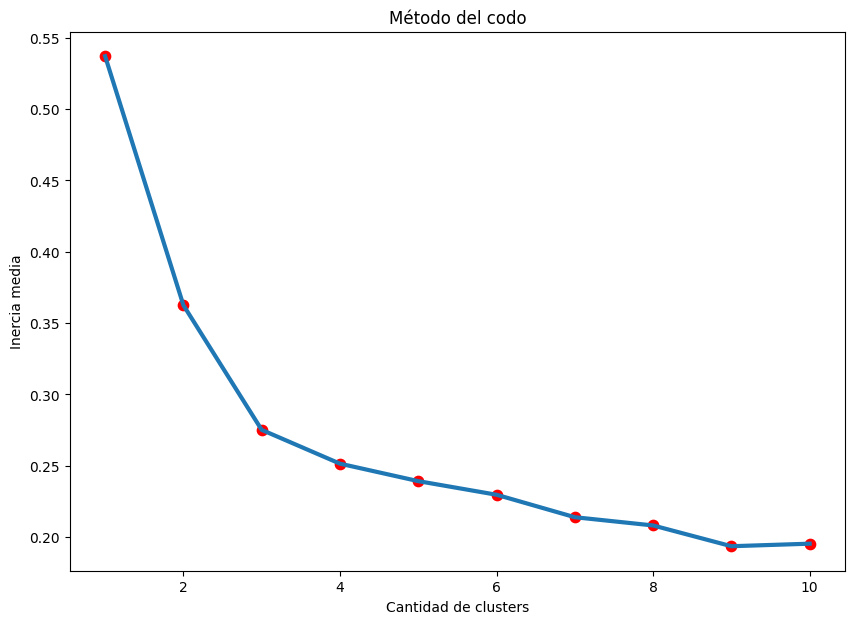

In [66]:
plt.figure(figsize = (10,7))
plt.plot(Cantidad_Clusters, Sum_of_squared_distances, lw=3)
plt.scatter(Cantidad_Clusters, Sum_of_squared_distances,s=55,c='r')
plt.xlabel('Cantidad de clusters')
plt.ylabel('Inercia media')
plt.title('Método del codo')

plt.show()

## Metodo silhouette

In [67]:
from sklearn.metrics import silhouette_score

# Creamos una lista donde iremos guardando los valores medios de silhouette
lista_sil = []

# Entrenamos un modelo para cada número de cluster que queremos testear
Cantidad_Clusters = np.arange(2,11)
for k in Cantidad_Clusters:
    # Definimos y entrenamos el modelo
    km = KMeans(n_clusters=k, max_iter=300)
    km = km.fit(df_normalizado)
    
    # Tomamos las etiquetas
    etiquetas = km.labels_
    
    # Calculamos el silhouette 
    valor_medio_sil = silhouette_score(df_normalizado, etiquetas)
    lista_sil.append(valor_medio_sil)

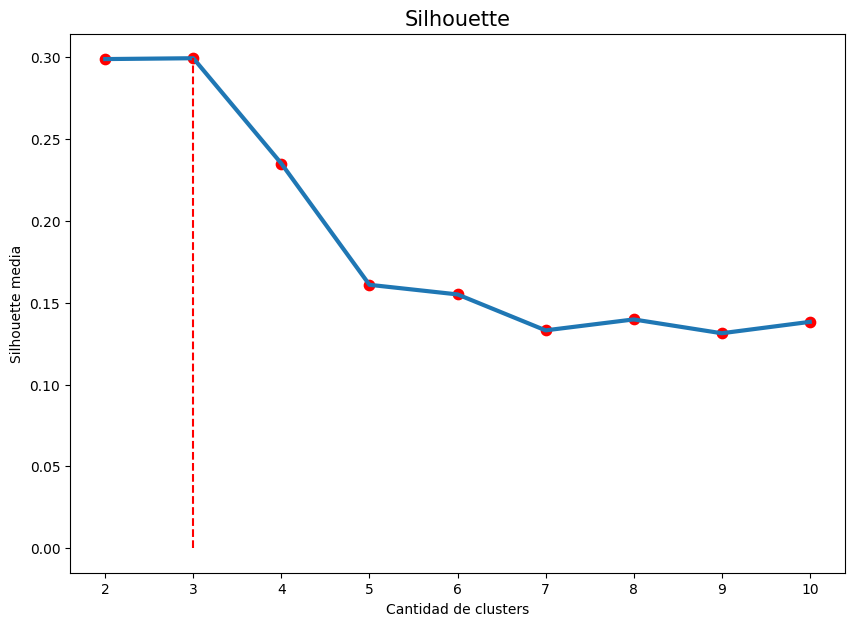

In [68]:
valor_max = max(lista_sil)
indice_max = lista_sil.index(valor_max)

plt.figure(figsize = (10,7))
plt.plot(Cantidad_Clusters, lista_sil, lw=3)
plt.scatter(Cantidad_Clusters, lista_sil,s=55,c='r')
plt.plot([Cantidad_Clusters[indice_max], Cantidad_Clusters[indice_max]], [0, valor_max], linestyle='--', color='red', label='Línea punteada')
plt.xlabel('Cantidad de clusters')
plt.ylabel('Silhouette media')
plt.title('Silhouette', fontsize = 15)
# Marcar el punto máximo en el gráfico

plt.show()

Como podemos ver en ambos metodos dio como resultado la mejor cantidad de cluster 3.

Si prestamos atencion al enunciado del challenge esto seria logico ya que cuenta con 3 tipos de vinos distintos.

# Creación de modelo

In [69]:
modelo_kmeans = KMeans(n_clusters= 3, max_iter=300) # Creamos el modelo

modelo_kmeans.fit(df_normalizado)                   # Entrenamos el modelo

KMeans(n_clusters=3)

# Clasificamos a los vinos

In [70]:
df['Kmeans_Clusters'] = modelo_kmeans.labels_

df.head() 

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Kmeans_Clusters
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


# Visualizacion de resultados

Para visualizar los datos en un grafico de 2D tenemos que reducir su dimensionalidad, para eso vamos a utilizar PCA de sklearn.

In [71]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)                                                                   # Como me interesa que tenga 2 dimensiones, mantenemos 2 componentes principlaes.

pca_wines = pca.fit_transform(df_normalizado)                                               # Ajustamos el modelo a los datos y transformamos los datos.

pca_wines_df = pd.DataFrame(data = pca_wines, columns = ['Componente-1', 'Componente-2'])   # Guardamos los 2 componentes principales en un df.
pca_wines_df = pd.concat([pca_wines_df, df['Kmeans_Clusters']], axis=1)                     # Unimos los 2 componentes con los clusters.

pca_wines_df

,Componente-1,Componente-2,Kmeans_Clusters
0,-0.706336,-0.253193,2
1,-0.484977,-0.008823,2
2,-0.521172,-0.189187,2
3,-0.821644,-0.580906,2
4,-0.202546,-0.059467,2
...,...,...,...
173,0.739510,-0.471901,1
174,0.581781,-0.348366,1
175,0.626313,-0.546857,1
176,0.572991,-0.425516,1


### Graficamos

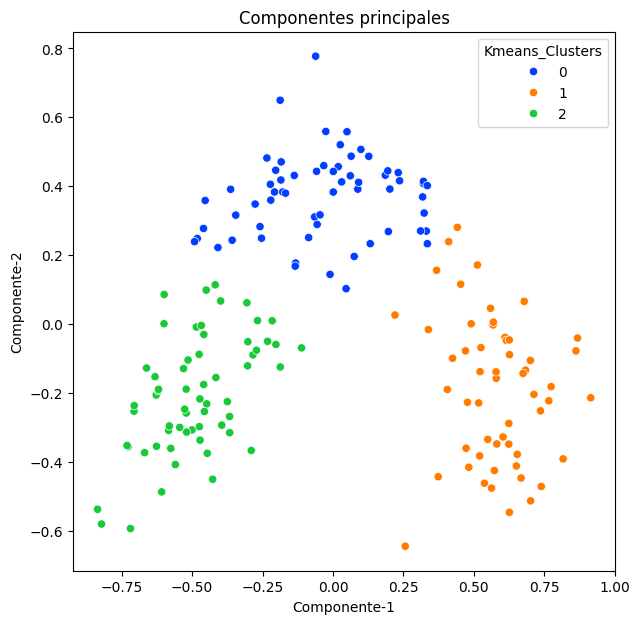

In [72]:
fig = plt.figure(figsize=(7,7))

sns.scatterplot(x = pca_wines_df['Componente-1'], y= pca_wines_df['Componente-2'], hue=pca_wines_df['Kmeans_Clusters'], palette = 'bright')

plt.title('Componentes principales')

plt.show()

Podemos observar que estan bien definidos los cluster ya que no observamos ninguno esta mezclados, osea graficamente no hay puntos de distintos colores mezclados.

Cada cluster, representa un tipo de vino

### Exportamos el df para seguir un analisis para realizar el storytelling

In [73]:
df.to_csv('wine_with_clusters.csv', index=False)